In [17]:
import pandas as pd
from functools import reduce

In [18]:
df1 = pd.read_parquet("train_회원정보.parquet")
df2 = pd.read_parquet("train_신용정보.parquet")
df3 = pd.read_parquet("train_승인매출정보.parquet")
df4 = pd.read_parquet("train_청구정보.parquet")
df5 = pd.read_parquet("train_잔액정보.parquet")
df6 = pd.read_parquet("train_채널정보.parquet")
df7 = pd.read_parquet("train_마케팅정보.parquet")
df8 = pd.read_parquet("train_성과정보.parquet")

In [19]:
key_cols = ["기준년월", "ID"]

train_merged = df1.merge(df2, on=key_cols, how="left")
train_merged = train_merged.merge(df3, on=key_cols, how="left")
train_merged = train_merged.merge(df4, on=key_cols, how="left")
train_merged = train_merged.merge(df5, on=key_cols, how="left")
train_merged = train_merged.merge(df6, on=key_cols, how="left")
train_merged = train_merged.merge(df7, on=key_cols, how="left")
train_merged = train_merged.merge(df8, on=key_cols, how="left")

In [20]:
print(train_merged.shape)
train_merged.head()

(400000, 858)


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201811,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0.999998,0.593415,1.000995,0.999998,0.999998,-0.038451,0.082848,0.000000,0.937722,1.478965
1,201811,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0.958567,0.900424,0.999998,0.999998,0.999998,-0.137989,-0.108572,0.000000,0.000000,0.000000
2,201811,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0.949292,0.590362,1.001704,0.999998,0.999998,0.429209,0.492050,-0.056812,0.496794,-0.218728
3,201811,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0.999998,1.052105,0.999381,0.999998,0.999998,-0.031881,0.132983,0.000000,1.653847,2.393391
4,201811,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [21]:
train_merged.to_csv("train_merged.csv", index=False)

In [22]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Columns: 858 entries, 기준년월 to 혜택수혜율_B0M
dtypes: float64(61), int64(747), object(50)
memory usage: 2.6+ GB


In [23]:
missing_ratio = train_merged.isnull().mean().sort_values(ascending=False)
missing_ratio.head(20)

연체일자_B0M          0.998645
_3순위여유업종          0.996672
_2순위여유업종          0.979925
_3순위납부업종          0.963503
_1순위여유업종          0.875485
_3순위교통업종          0.858982
_2순위납부업종          0.851187
최종카드론_대출일자        0.828470
최종카드론_신청경로코드      0.815630
최종카드론_금융상환방식코드    0.815595
RV신청일자            0.813620
_2순위교통업종          0.698228
OS구분코드            0.680652
_3순위쇼핑업종          0.551532
_1순위납부업종          0.515460
_1순위교통업종          0.493798
_2순위쇼핑업종          0.479665
_3순위업종            0.473335
_2순위신용체크구분        0.402238
_1순위쇼핑업종          0.396600
dtype: float64

In [24]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

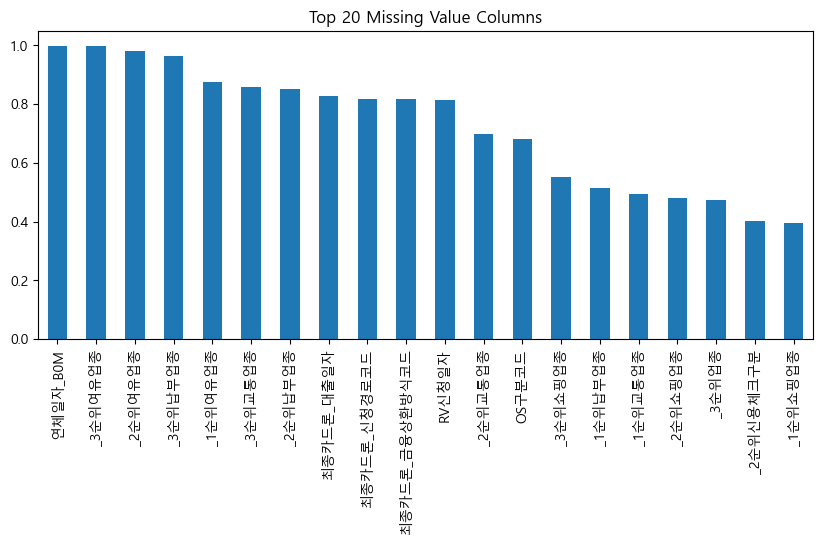

In [25]:
import matplotlib.pyplot as plt

missing_ratio.head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Missing Value Columns")
plt.show()

In [26]:
missing_top20 = missing_ratio.head(20).reset_index()
missing_top20.columns = ["column", "missing_ratio"]
missing_top20

,column,missing_ratio
0,연체일자_B0M,0.998645
1,_3순위여유업종,0.996672
2,_2순위여유업종,0.979925
3,_3순위납부업종,0.963503
4,_1순위여유업종,0.875485
5,_3순위교통업종,0.858982
6,_2순위납부업종,0.851187
7,최종카드론_대출일자,0.828470
8,최종카드론_신청경로코드,0.815630
9,최종카드론_금융상환방식코드,0.815595


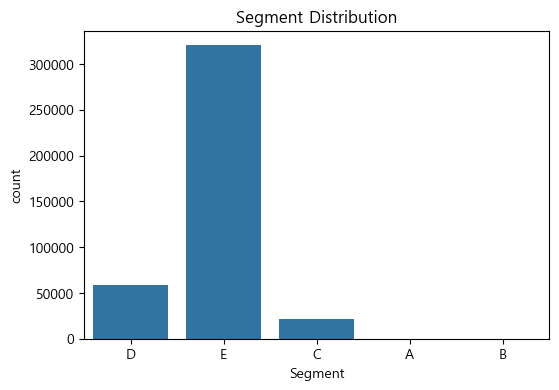

In [27]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', data=train_merged)
plt.title("Segment Distribution")
plt.show()

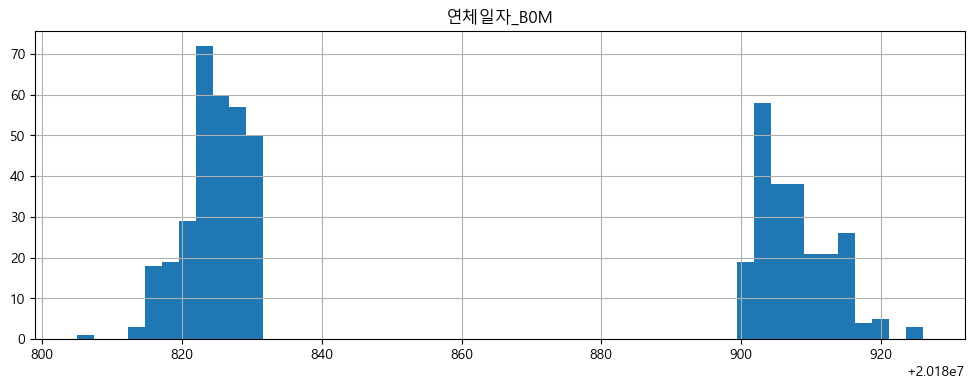

In [28]:
numeric_cols = ['연체일자_B0M', '_3순위여유업종', '_2순위여유업종']
train_merged[numeric_cols].hist(figsize=(12,4), bins=50)
plt.show()

Segment
A             NaN
B             NaN
C    2.018087e+07
D    2.018086e+07
E    2.018086e+07
Name: 연체일자_B0M, dtype: float64


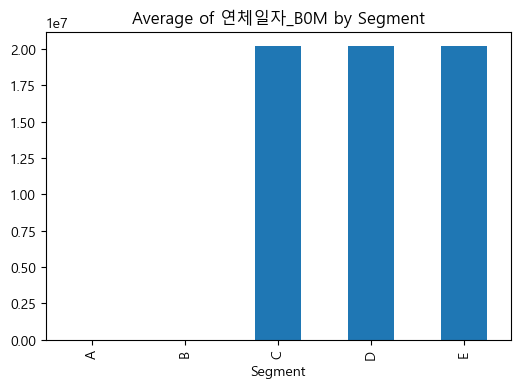

In [29]:
col = '연체일자_B0M'

seg_mean = train_merged.groupby('Segment')[col].mean()
print(seg_mean)

seg_mean.plot(kind='bar', figsize=(6,4))
plt.title(f"Average of {col} by Segment")
plt.show()

In [30]:
train_merged.head()
train_merged.shape

(400000, 858)

In [31]:
train_merged['Segment'].value_counts()

Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

In [16]:
train_merged.dtypes.head(20)

cat_cols = train_merged.select_dtypes(include=['object']).columns.tolist()
num_cols = train_merged.select_dtypes(exclude=['object']).columns.tolist()

print("类别型列数量：", len(cat_cols))
print(cat_cols[:20])
print()
print("数值型列数量：", len(num_cols))
print(num_cols[:20])

类别型列数量： 50
['ID', '연령', 'Segment', '가입통신회사코드', '거주시도명', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분', '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M', 'Life_Stage', '자발한도감액횟수_R12M', '한도증액횟수_R12M', '카드론동의여부', 'RV전환가능여부', '한도심사요청건수', '_1순위업종']

数值型列数量： 808
['기준년월', '남녀구분코드', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내']


In [32]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = train_merged.copy()

for col in cat_cols:
    le = LabelEncoder()
    data[col] = data[col].fillna('Missing')
    data[col] = le.fit_transform(data[col])

data.head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201811,0,2,2,3,1,1,0,1,1,...,0.999998,0.593415,1.000995,0.999998,0.999998,-0.038451,0.082848,0.000000,0.937722,1.478965
1,201811,1,1,1,4,1,1,1,1,1,...,0.958567,0.900424,0.999998,0.999998,0.999998,-0.137989,-0.108572,0.000000,0.000000,0.000000
2,201811,2,1,1,2,1,1,0,1,1,...,0.949292,0.590362,1.001704,0.999998,0.999998,0.429209,0.492050,-0.056812,0.496794,-0.218728
3,201811,3,2,2,3,1,1,0,1,2,...,0.999998,1.052105,0.999381,0.999998,0.999998,-0.031881,0.132983,0.000000,1.653847,2.393391
4,201811,4,2,2,4,1,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [33]:
y = data['Segment']
X = data.drop(['Segment', 'ID'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2, 
    random_state=42,
    stratify=y  
)

X_train.shape, X_val.shape

((320000, 856), (80000, 856))

In [35]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00


In [38]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 4.9 MB/s eta 0:00:15
   - -------------------------------------- 1.8/72.0 MB 4.7 MB/s eta 0:00:15
   - -------------------------------------- 2.6/72.0 MB 4.2 MB/s eta 0:00:17
   -- ------------------------------------- 3.9/72.0 MB 5.0 MB/s eta 0:00:14
   --- ------------------------------------ 5.8/72.0 MB 5.5 MB/s eta 0:00:13
   --- ------------------------------------ 6.6/72.0 MB 5.6 MB/s eta 0:00:12
   ---- ----------------------------------- 8.1/72.0 MB 5.6 MB/s eta 0:00:12
   ----- ---------------------------------- 9.4/72.0 MB 5.6 MB/s eta 0:00:12
   ----- ---------------------------------- 10.7/72.0 MB 5.7 MB/s eta 0:00:11
   ------ --------------------------------- 12.6/72.0 MB 6.0 MB/s eta 0:00:10
   ------- -------------------------------- 14.2/72.0 MB 6.2 MB/s eta 0:00:10
   -------- ------------------------------- 15.5/72.0 MB 6.3 MB/s eta 0:00:10
  

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist'
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))

Accuracy: 0.9138375
F1 Score: 0.5084617437055515
